# 경통분 hw1

MFE 20249433 최재필

In [20]:
import seaborn as sns

import numpy as np
import pandas as pd

import math

## 1. 

- numerical 
    - discrete
    - continuous
- categorical
    - nominal
    - ordinal

뷴류하시오

- a. numerical / discrete
- b. numerical / continuous
- c. categorical / ordinal
- d. numerical / continuous
- e. categorical / ordinal
- f. numerical / continous
- g. numerical / discrete
- h. numerical / discrete
- i. categorical / nominal
- j. numerical / continuous


## 2. 

In [3]:
data = [
    0.0, 0.0, 0.04, 0.21, 0.29, 0.54, 0.63, 0.88, 0.96, 1.25, 1.67, 1.75, 1.84, 1.96,
    2.01, 2.51, 2.72, 3.3, 3.51, 4.05, 4.85, 6.94, 8.73, 10.57, 11.11, 12.45, 14.0,
    17.3, 17.92, 18.05, 18.43, 22.48, 22.48, 23.48, 26.32, 26.45, 28.87,
    ]


### a. 

Plot the data in a histogram and describe the shape of the frequency distribution. 

<Axes: ylabel='Count'>

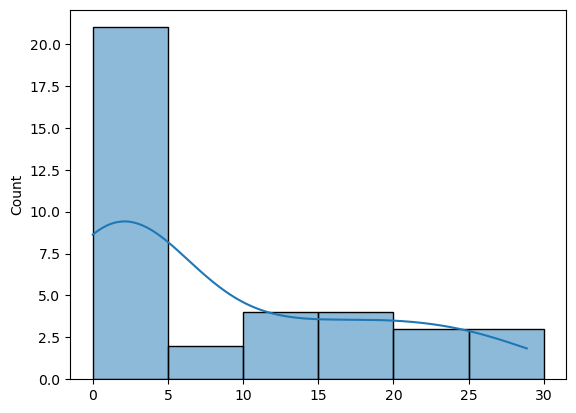

In [4]:
sns.histplot(data, kde=True, binrange=(0, 30), bins=6)

- Shape of the distribution: 
    - 0~5 사이의 빈도가 매우 높고 나머지는 상대적으로 평평함. 
        - Skewed to the right
    - 전체 분포를 너무 크게 벗어나는 outlier가 존재하진 않음. 

### b. 

Approximate the mean and median of the distribution. Which should be greater? Explain your reasoning. 

- Visual approximation:
    - Median < Mean
- Explain my reasoning:
    - 위와 같이 positive skew가 있을 때, 오른쪽으로 꼬리가 매우 길다고 상상해보면 outlier의 값에 의해 평균은 끌어내려지게 된다.
    - 즉, 아무리 대세는 대부분의 관측치가 몰려있는 왼쪽이라고 하더라도 오른쪽의 몇 안되는 극단 값에 의해 평균이 오른쪽으로 이동하게 된다. 
    - 반면 median은 오직 관측치의 수에만 기반하므로 outlier의 영향을 받지 않는다. 
    - 그러므로 Median < Mean 이 될 것이라 예측해볼 수 있다. 

### c. 

예측이 맞았다. 

In [5]:
mean = np.mean(data)
mean

8.663513513513513

In [6]:
median = np.median(data)
median

3.51

### d. 

In [30]:
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)

print(f'''
1st quantile: {q1}
3rd quantile: {q3}
''')


1st quantile: 1.25
3rd quantile: 17.3



In [31]:
IQR = q3 - q1
IQR

16.05

### e.

<Axes: >

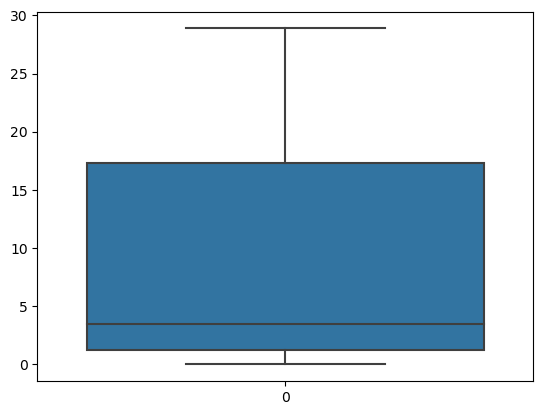

In [9]:
sns.boxplot(data=data)

## 3.

### a.

It is a histogram. (frequency distribution)

### b.

Approx value of the mean seems to be around 1,000

- The distribution has
    - positive skew: There are more values under 1100 than over 1100. 
    - However, the right tail is fatter than the left tail, indicating that the skew can be evened out when arithmetic mean is calculated. 
    - Thus, my guess is that the mean should be around 1,000.

### c.

Approx value of the median seems to be around 1,000

- The distribution has:
    - positive skew, so the area is not symmetrical. Around 900 cuts the area in half. 

Since the median is the location where the frequency is divided 50:50, it should be about 1,000.



### d.

Unlike mean or median, mode seems to be pretty obvious. Mode is the most frequent value/data bin. 

1,000~1,100 bin has the largest frequency - the highest bar - so mode should be around 1,100.

### e.

Given the distribution is seemingly a little bit skewed from the normal distribution, we can approximate +-1 sigma range. 

+-1 sigma in normal distribution is about 70%, so 1 std should be about 200 yards. 



## 4. 

In [10]:
body = [
    ('A', 17, 150),
    ('B', 15, 154),
    ('C', 19, 169),
    ('D', 17, 172),
    ('E', 21, 175),
]

In [11]:
df = pd.DataFrame(body, columns=['Person', 'Hand', 'Height'])
df

,Person,Hand,Height
0,A,17,150
1,B,15,154
2,C,19,169
3,D,17,172
4,E,21,175


In [13]:
n = len(df)

In [39]:
df.describe() # Pandas 는 default로 std 등을 구할 때 sample std를 구한다.

,Hand,Height
count,5.000000,5.000000
mean,17.800000,164.000000
std,2.280351,11.247222
min,15.000000,150.000000
25%,17.000000,154.000000
50%,17.000000,169.000000
75%,19.000000,172.000000
max,21.000000,175.000000


In [38]:
df.describe().loc['std', :] ** 2

Hand        5.2
Height    126.5
Name: std, dtype: float64

### a.

In [40]:
math.sqrt((df['Hand'] ** 2).mean() - (df['Hand'].mean() ** 2)) # population std

2.039607805437106

In [54]:
E_X2 = (df['Hand'] ** 2).sum() / (n-1)
E_Xsqrd = df['Hand'].mean() ** 2 * n / (n-1)

In [56]:
math.sqrt(E_X2 - E_Xsqrd) # sample std

2.280350850198261

In [50]:
math.sqrt(((df['Hand'] - df['Hand'].mean()) ** 2).sum() / (n-1)) sample std

2.2803508501982757

### b.

In [27]:
(df['Hand'] ** 2).sum() / (n-1)

401.25

In [28]:
((df['Hand'].sum() / (n-1)) ** 2)

495.0625

### c.

In [34]:
df.iloc[:, 1:].cov()

,Hand,Height
Hand,5.2,18.5
Height,18.5,126.5


### d.

In [35]:
df.iloc[:, 1:].corr()

,Hand,Height
Hand,1.000000,0.721315
Height,0.721315,1.000000
